In [17]:
import pandas as pd
import sqlite3
from sqlite3 import Error

#getting user input to create variables that will be used in the query
import re

play = input("Pick a play ")
print("You picked " + play + ".")
act = input("Pick an act ")
print("So, you want to see the words from Act " + str(act) + " of " + play + ".")

#remove whitespace, special characters, and capitalization
play_choice = re.sub('\W+','', play.lower())


Pick a play merchant of venice
You picked merchant of venice.
Pick an act 2
So, you want to see the words from Act 2 of merchant of venice.


In [18]:
conn = sqlite3.connect('shakespeares_works.db')#connect to database
cur = conn.cursor()
play_search = (play_choice)
cur.execute("SELECT PlayerLine FROM shakespeares_works WHERE searchname=? AND ActSceneLine LIKE ?", (play_search, act+'%'))#take the user's input for play and act choice and query the db
words = cur.fetchall() #variable to hold what's returned by the sql query
conn.close()


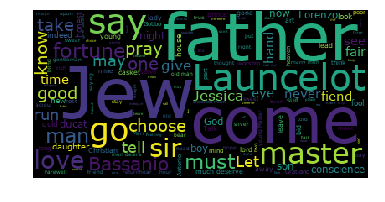

In [19]:
from os import path
from scipy.misc import imread
import matplotlib.pyplot as plt
import random

from wordcloud import WordCloud, STOPWORDS
stopit = set(STOPWORDS) #set variable for list of stop words as a set
shake_stop = ['thee', 'tis', 'us', 'yet', 'hath', 'will', 'thou', 'ay', 'nay', 'well', 'thy', 'doth']#additional middle english
for word in shake_stop:
    stopit.add(word) #add in shakespearean stop words to the modern set
text = str(words)
wordcloud = WordCloud(font_path='/Library/Fonts/Verdana.ttf',
                      relative_scaling = 1.0,
                      stopwords = stopit # set or space-separated string
                      ).generate(text)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()